

# **PROJECT NAME: CognitiveQuest**
---
(***This project is to predict the possibility of autism***)



# **CASE STUDY IMPLEMENTATION**

**Abstract**:
Autistic Spectrum Disorder (ASD) is a neurodevelopmental condition associated with significant healthcare costs, and early diagnosis can significantly reduce these. Unfortunately, waiting times for an ASD diagnosis are lengthy and procedures are not cost effective.

**Objective:**

Creating a Multi-layer Perceptron(MLP) model offline and saving it as a pkl file.

Evaluate the model(s) using all the metrics required on a Jupyter Notebook and demonstrate how good is the model(s)

1. Create the whole pipeline process with Python functions.
2. Load the pipeline on the cloud platform in such a way that the model can be retrained again, and create a trigger for retraining the model when the need arises.
3. Demonstrate the evaluation process of the model in production.
4. [Optional] Simulate a flood of requests(using software like Locust) send them to the model and show how the model responds to these requests. Record and show the latency and response time of the requests with different numbers of docker containers.
5. Demonstrate how a user uploads values/features and the model predicts










# **The Dataset**
**Short Description of the Data:**

The dataset contains information pertinent to the screening of autism spectrum disorder (ASD), comprising the following columns:

1. ID: Unique identifier for each patient
2. A1_Score to A10_Score: Scores derived from the Autism Spectrum Quotient (AQ) 10 item screening tool
3. age: Age of the patient in years
4. gender: Gender of the patient
5. ethnicity: Ethnicity of the patient
6. jaundice: Indicator of whether the patient experienced jaundice at birth
7. autism: Indication of whether an immediate family member has been diagnosed with autism
8. country_of_res: Country where the patient resides
9. used_app_before: Flag indicating if the patient has previously undergone a screening test
10. result: Aggregate score for AQ1-10 screening test
11. age_desc: Description of the patient's age
12. relation: Relationship of the individual who completed the test with the patient
13. Class/ASD: Binary classification of ASD presence, where 0 signifies No ASD and 1 indicates ASD presence (target column)

The dataset is divided into a training set (train.csv) and a test set (test.csv).

The primary objective is to forecast the probability of an individual having ASD based on the provided features, with the "Class/ASD" column serving as the target variable for prediction.

# **Data Cleaning, Feature Engineering, Transformation**

In [1]:
#Import Necessary Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
import scipy.stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from joblib import dump
from scipy.stats import mstats
import os
import xgboost as xgb
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss, roc_auc_score, cohen_kappa_score, confusion_matrix
import joblib
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
import warnings
warnings.filterwarnings('ignore')




Load Datasets

In [2]:
# load data
def load_autism_data():
    # Load data
    df_children = pd.read_csv('Autism-Child-Data.csv')
    df_adults = pd.read_csv('Autism-Adult-Data.csv')

    return df_children, df_adults

    # Load the data
df_children, df_adults = load_autism_data()

***Current Format of the Data:***

The current format of the data varies slightly across the two datasets:  children and adults. Each dataset consists of multiple instances (cases) where each instance represents an individual, and each instance contains several attributes/features related to autism screening, such as behavioral responses, demographic information, and diagnostic outcomes. The attributes include categorical, binary, and continuous variables, and the datasets are intended for classification tasks in the medical, health, and social science domains.

***Outline of Planned Transformation to Unified Format:***

To achieve a unified format suitable for analysis and modeling, the following steps will be taken:

- Ensure that each dataset has the same set of features with consistent naming conventions.
- Merge the datasets into a single dataset, ensuring compatibility of features and target variables.
- Address missing values and inconsistencies in the data.
- Standardize categorical variables if necessary.





Check Features

In [3]:
def enumerate_features(df, dataset_name):
    print(f"Features included in the {dataset_name} dataset:")
    for feature in df.columns:
        print("-", feature)


def check_rows_and_columns(df, dataset_name):
    print(f"{dataset_name} - rows: {df.shape[0]}, columns: {df.shape[1]}")


def inspect_structure(df, dataset_name):
    print(f"{dataset_name}:")
    print(df.head())  # Display the first few rows


# Enumerate features included in the child dataset
enumerate_features(df_children, "child")

# Enumerate features included in the adult dataset
enumerate_features(df_adults, "adult")

# Check rows and columns for both datasets
check_rows_and_columns(df_children, "children")
check_rows_and_columns(df_adults, "adults")

# Inspect the structure
inspect_structure(df_children, "children")
inspect_structure(df_adults, "adults")

Features included in the child dataset:
- id
- A1_Score
- A2_Score
- A3_Score
- A4_Score
- A5_Score
- A6_Score
- A7_Score
- A8_Score
- A9_Score
- A10_Score
- age
- gender
- ethnicity
- jundice
- austim
- contry_of_res
- used_app_before
- result
- age_desc
- relation
- Class/ASD
Features included in the adult dataset:
- id
- A1_Score
- A2_Score
- A3_Score
- A4_Score
- A5_Score
- A6_Score
- A7_Score
- A8_Score
- A9_Score
- A10_Score
- age
- gender
- ethnicity
- jundice
- austim
- contry_of_res
- used_app_before
- result
- age_desc
- relation
- Class/ASD
children - rows: 292, columns: 22
adults - rows: 704, columns: 22
children:
   id  A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0   1         1         1         0         0         1         1         0   
1   2         1         1         0         0         1         1         0   
2   3         1         1         0         0         0         1         1   
3   4         0         1         0         0     

Data Overview

In [4]:
def data_overview(df, dataset_name):
    print(f"\n{dataset_name} Data Overview:")
    print(df.info())
    print("\nSummary Statistics:")
    print(df.describe())


# Data overview for child dataset
data_overview(df_children, "Children")

# Data overview for adult dataset
data_overview(df_adults, "Adults")


Children Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               292 non-null    int64 
 1   A1_Score         292 non-null    int64 
 2   A2_Score         292 non-null    int64 
 3   A3_Score         292 non-null    int64 
 4   A4_Score         292 non-null    int64 
 5   A5_Score         292 non-null    int64 
 6   A6_Score         292 non-null    int64 
 7   A7_Score         292 non-null    int64 
 8   A8_Score         292 non-null    int64 
 9   A9_Score         292 non-null    int64 
 10  A10_Score        292 non-null    int64 
 11  age              292 non-null    object
 12  gender           292 non-null    object
 13  ethnicity        292 non-null    object
 14  jundice          292 non-null    object
 15  austim           292 non-null    object
 16  contry_of_res    292 non-null    object
 17  used_app_b

Analyze distributions of numerical features


Analysis for Children:


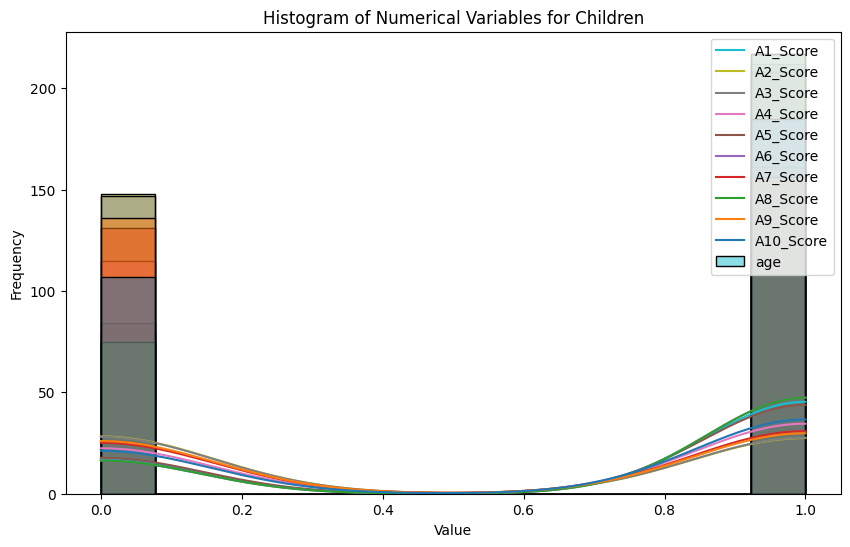


Analysis for Adults:


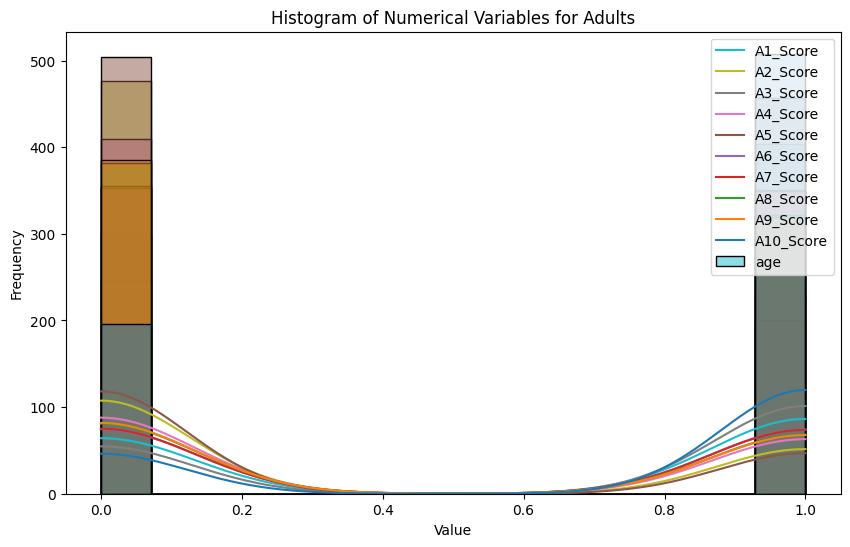

In [5]:
def plot_numerical_feature_distributions(df_children, df_adults):
    # Analysis for Children
    print("\nAnalysis for Children:")
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df_children[['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
                                   'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age']], kde=True)
    plt.title('Histogram of Numerical Variables for Children')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.legend(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
                'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age'], loc='upper right')
    plt.show()

    # Analysis for Adults
    print("\nAnalysis for Adults:")
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df_adults[['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
                                 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age']], kde=True)
    plt.title('Histogram of Numerical Variables for Adults')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.legend(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
                'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age'], loc='upper right')
    plt.show()


plot_numerical_feature_distributions(df_children, df_adults)

Analyze correlations

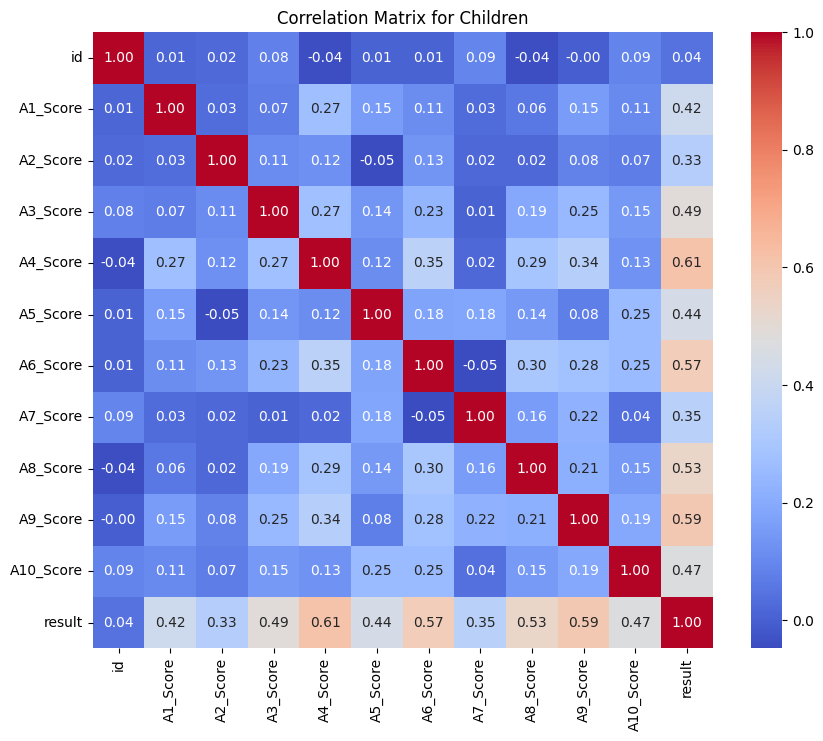

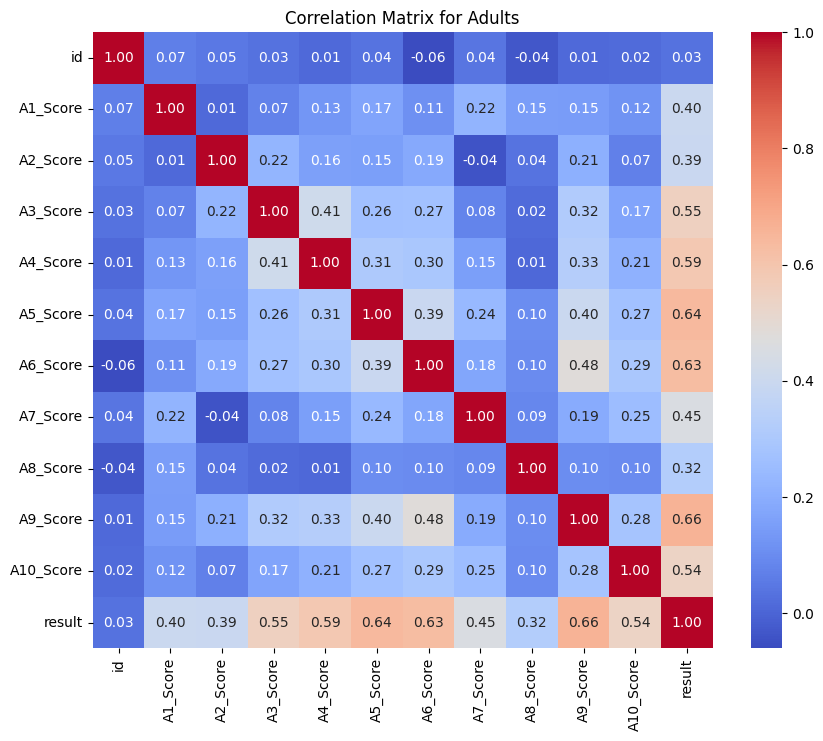

In [6]:
def plot_correlation_matrices(df_children, df_adults):
    # Filter out non-numeric columns
    numeric_columns_children = df_children.select_dtypes(include=[np.number])
    numeric_columns_adults = df_adults.select_dtypes(include=[np.number])

    # Correlation Matrix for Children
    correlation_matrix_children = numeric_columns_children.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix_children,
                annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix for Children')
    plt.show()

    # Correlation Matrix for Adults (using the same variable as for children)
    correlation_matrix_adults = numeric_columns_adults.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix_adults, annot=True,
                cmap='coolwarm', fmt=".2f")  # using the same variable
    plt.title('Correlation Matrix for Adults')
    plt.show()


plot_correlation_matrices(df_children, df_adults)

Merge both datasets

In [7]:
def merge_datasets(df1, df2):
    try:
        merged_data = pd.concat([df1, df2], ignore_index=True)
        print("Datasets concatenated successfully.")
        return merged_data
    except ValueError as e:
        print("Error:", e)
        print(
            "Column mismatch detected. Check column names and data types in both datasets.")
        return None


# Merge datasets
merged_data = merge_datasets(df_adults, df_children)


if merged_data is not None:
    print("Merged dataset shape:", merged_data.shape)
    print("Columns in merged dataset:", merged_data.columns)

Datasets concatenated successfully.
Merged dataset shape: (996, 22)
Columns in merged dataset: Index(['id', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res',
       'used_app_before', 'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')


Rename misspelled columns

In [8]:
def rename_columns(df):
    renamed_columns = {
        'austim': 'autism',
        'jundice': 'jaundice',
        'contry_of_res': 'country_of_res',

    }
    df = df.rename(columns=renamed_columns)
    return df


merged_data = rename_columns(merged_data)
merged_data.head()

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,autism,country_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,1,0,0,1,1,0,...,f,White-European,no,no,United States,no,6,18 and more,Self,NO
1,2,1,1,0,1,0,0,0,1,0,...,m,Latino,no,yes,Brazil,no,5,18 and more,Self,NO
2,3,1,1,0,1,1,0,1,1,1,...,m,Latino,yes,yes,Spain,no,8,18 and more,Parent,YES
3,4,1,1,0,1,0,0,1,1,0,...,f,White-European,no,yes,United States,no,6,18 and more,Self,NO
4,5,1,0,0,0,0,0,0,1,0,...,f,?,no,no,Egypt,no,2,18 and more,?,NO


Rename misspelled responses

In [9]:
def rename_misspelled_responses(df):
    # Rename misspelled responses
    df['relation'].replace('self', 'Self', inplace=True)
    return df


# Call the function with the merged dataset
merged_data = rename_misspelled_responses(merged_data)

Check for missing data in merged dataset

In [10]:
def check_missing_data(df, dataset_name):
    missing_data = df.isna().sum()
    print(f"Missing data in {dataset_name} dataset:")
    print(missing_data)


# Check for missing data in the merged dataset
check_missing_data(merged_data, "merged")

Missing data in merged dataset:
id                 0
A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jaundice           0
autism             0
country_of_res     0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64


Handling missing data

In [11]:
def handle_missing_data(df):
    # Replace '?' with NaN in the 'ethnicity' column
    merged_data['ethnicity'].replace('?', np.NaN, inplace=True)

    # Replace '?' with NaN in the 'relation' column
    merged_data['relation'].replace('?', np.NaN, inplace=True)

    # Replace '?' with NaN in the 'age' column
    merged_data['age'].replace('?', np.NaN, inplace=True)

    return merged_data


merged_data = handle_missing_data(merged_data)

Imputing missing values of categorical features with mode

In [12]:
def replace_non_numeric_with_nan(df):
    df['age'] = pd.to_numeric(df['age'], errors='coerce')
    return df


# Replace non-numeric values with NaN in the merged dataset
merged_data = replace_non_numeric_with_nan(merged_data)

Imputing missing non-numerical values with mean

In [13]:
numerical_features = ['age', 'result']


def impute_missing_with_mean(merged_data, numerical_features):
    """
    Impute missing values of numerical features in the DataFrame with mean.

    """

    imputer_mean = SimpleImputer(missing_values=np.NaN, strategy='mean')
    merged_data[numerical_features] = imputer_mean.fit_transform(
        merged_data[numerical_features])


impute_missing_with_mean(merged_data, numerical_features)

Finding Outliers in both datasets

In [14]:
def find_outliers_age(df, dataset_name):
    max_age = df['age'].max()
    min_age = df['age'].min()

    print(f'Maximum age in {dataset_name} dataset:', max_age)
    print(f'Minimum age in {dataset_name} dataset:', min_age)


# Outliers for Age in Children
find_outliers_age(merged_data, "Merged Dataset")

# Removing row with maximum age from merged dataset
max_age_row_index = merged_data['age'].idxmax()
print("Removing row:", max_age_row_index, "as the respondent has an age of",
      merged_data.loc[max_age_row_index, 'age'], "which is impossible.")
merged_data.drop(index=max_age_row_index, inplace=True)
merged_data.reset_index(drop=True, inplace=True)

Maximum age in Merged Dataset dataset: 383.0
Minimum age in Merged Dataset dataset: 4.0
Removing row: 52 as the respondent has an age of 383.0 which is impossible.


Drop Unused columns

In [15]:
def drop_unused_columns(df):
    # Drop unused columns
    unused_columns = ['id', 'age_desc', 'result']
    df.drop(columns=unused_columns, inplace=True)

    # Print messages about dropped columns
    print("Columns 'id' and 'age_desc' are considered irrelevant and 'age_range' is standard. Dropping them.")

    return df


merged_data = drop_unused_columns(merged_data)
merged_data.head()

Columns 'id' and 'age_desc' are considered irrelevant and 'age_range' is standard. Dropping them.


,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,autism,country_of_res,used_app_before,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26.0,f,White-European,no,no,United States,no,Self,NO
1,1,1,0,1,0,0,0,1,0,1,24.0,m,Latino,no,yes,Brazil,no,Self,NO
2,1,1,0,1,1,0,1,1,1,1,27.0,m,Latino,yes,yes,Spain,no,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,35.0,f,White-European,no,yes,United States,no,Self,NO
4,1,0,0,0,0,0,0,1,0,0,40.0,f,NaN,no,no,Egypt,no,NaN,NO


Analyzing Each Column

Ethnicity

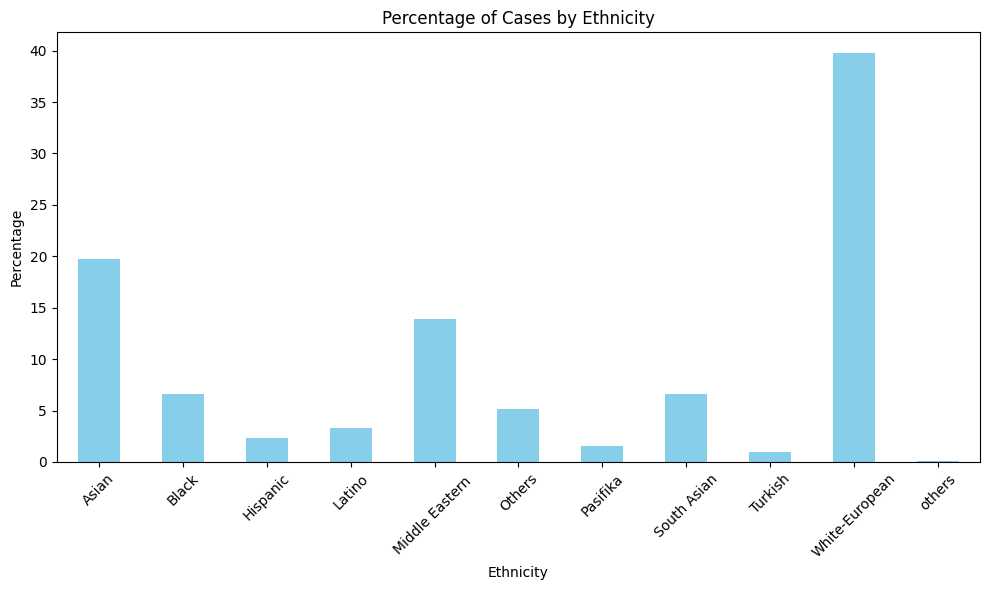

In [16]:
def plot_ethnicity_percentages(df):
    # Group the data by ethnicity and calculate the size of each group
    ethnicity_counts = df.groupby('ethnicity').size()

    # Calculate the total number of cases
    total_cases = ethnicity_counts.sum()

    # Calculate the percentage of cases for each ethnicity
    ethnicity_percentages = (ethnicity_counts / total_cases) * 100

    # Plot the percentages
    plt.figure(figsize=(10, 6))
    ethnicity_percentages.plot(kind='bar', color='skyblue')
    plt.title('Percentage of Cases by Ethnicity')
    plt.xlabel('Ethnicity')
    plt.ylabel('Percentage')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


plot_ethnicity_percentages(merged_data)

Conclusion : White Europeans have most cases of ASD around the world
followed by asians.

Gender

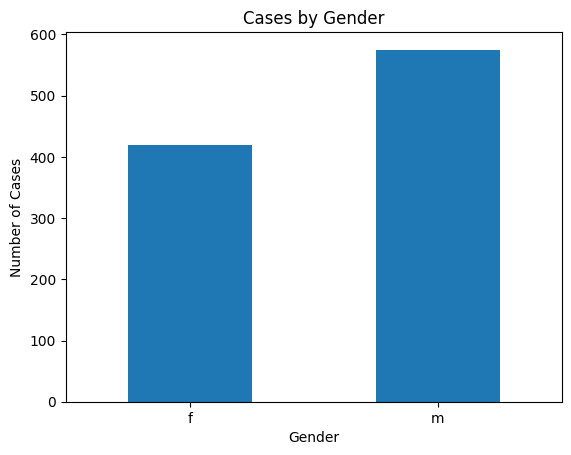

In [17]:
def plot_cases_by_gender(df):
    # Group the data by gender and calculate the size of each group
    gender_counts = df.groupby('gender').size()

    # Plot the number of cases by gender
    gender_counts.plot(kind='bar')

    # Adding labels and title to the plot
    plt.xlabel('Gender')
    plt.ylabel('Number of Cases')
    plt.title('Cases by Gender')
    plt.xticks(rotation=360)

    plt.show()


plot_cases_by_gender(merged_data)

Conclusion : Males are more prone to ASD in comparision to Females

Jaundice

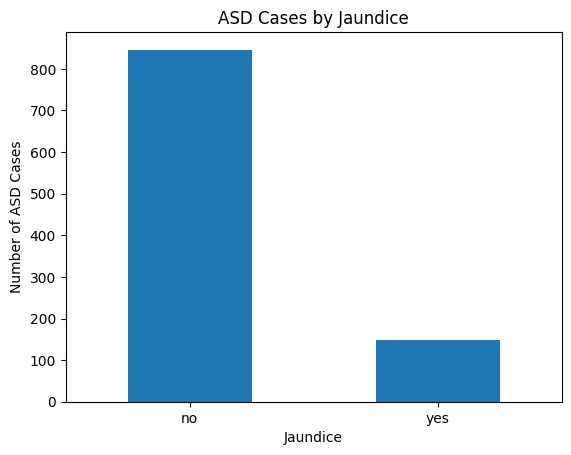

In [18]:
def plot_cases_by_jaundice(df):
    # Group the data by jaundice and calculate the size of each group
    jaundice_counts = df.groupby('jaundice').size()

    # Plot the number of ASD cases by jaundice
    jaundice_counts.plot(kind='bar')

    # Adding labels and title to the plot
    plt.xlabel('Jaundice')
    plt.ylabel('Number of ASD Cases')
    plt.title('ASD Cases by Jaundice')
    plt.xticks(rotation=360)

    plt.show()


plot_cases_by_jaundice(merged_data)

Conclusion : Having jundice does not determine you will have autism.

Relation

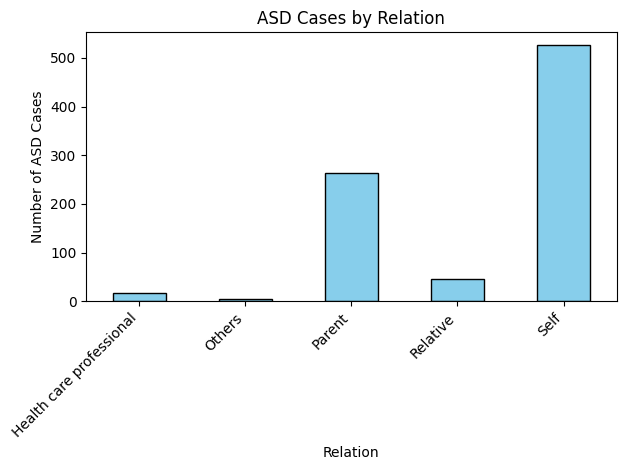

In [19]:
def plot_cases_by_relation(df):
    # Aggregate duplicate labels by counting the number of occurrences
    relation_counts = df.groupby('relation').size()

    # Plot the aggregated counts
    relation_counts.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.xlabel('Relation')
    plt.ylabel('Number of ASD Cases')
    plt.title('ASD Cases by Relation')
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


plot_cases_by_relation(merged_data)

Conclusion : Most ASD cases around the world do not have their family members with ASD that means ASD is not a genetic disease.

Age

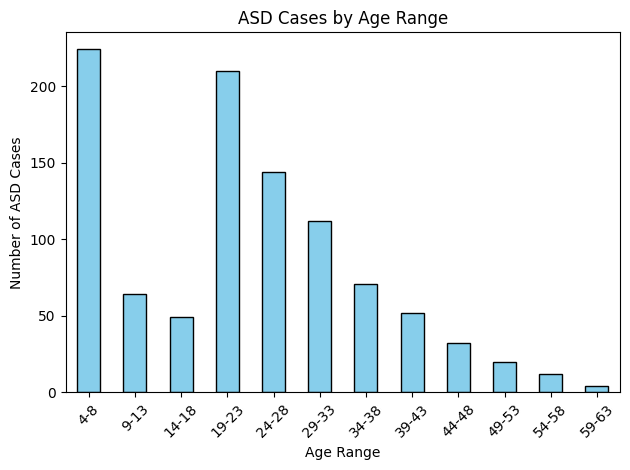

In [20]:
def plot_cases_by_age_range(df):
    # Create bins from 4 to 64 with a step size of 5
    age_bins = np.arange(4, 65, 5)

    # Create age labels for the bins
    age_labels = [f'{age}-{age+4}' for age in age_bins[:-1]]

    # Discretize age into bins and assign labels
    df['age_range'] = pd.cut(df['age'], bins=age_bins,
                             labels=age_labels, right=False)

    # Plotting the number of cases by age range
    df.groupby('age_range').size().plot(
        kind='bar', color='skyblue', edgecolor='black')
    plt.xlabel('Age Range')
    plt.ylabel('Number of ASD Cases')
    plt.title('ASD Cases by Age Range')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


plot_cases_by_age_range(merged_data)

Conclusion: Most ASD cases are highest with persons between 4-8 years and 19-23 years

Qchat

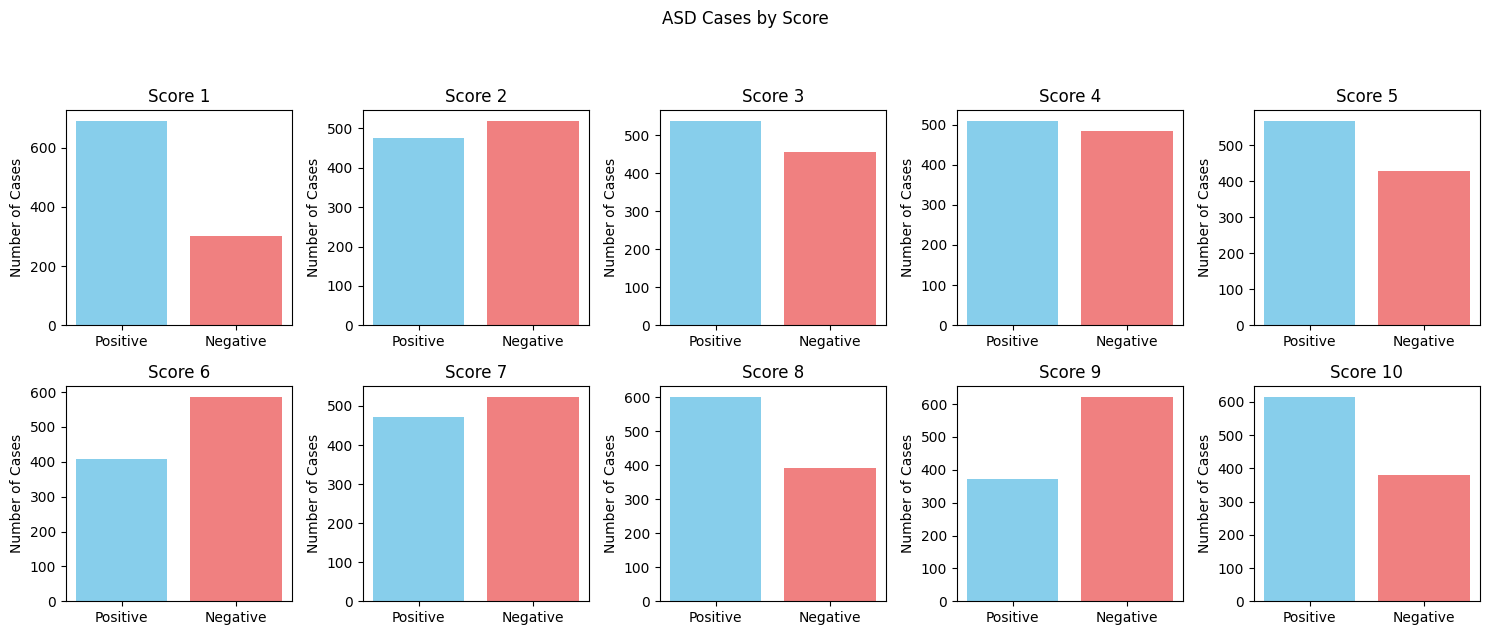

In [21]:
def plot_cases_by_score(df):
    # Get the counts of positive scores for each question
    score_counts = df[['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
                       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score']].sum()

    # Create a bar plot for each score
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))
    fig.suptitle('ASD Cases by Score', y=1.05)

    for i, (score, ax) in enumerate(zip(score_counts.index, axes.flatten())):
        ax.bar(['Positive', 'Negative'], [score_counts[score], len(
            df) - score_counts[score]], color=['skyblue', 'lightcoral'])
        ax.set_title(f'Score {i+1}')
        ax.set_ylabel('Number of Cases')

    plt.tight_layout()
    plt.show()


plot_cases_by_score(merged_data)

Country

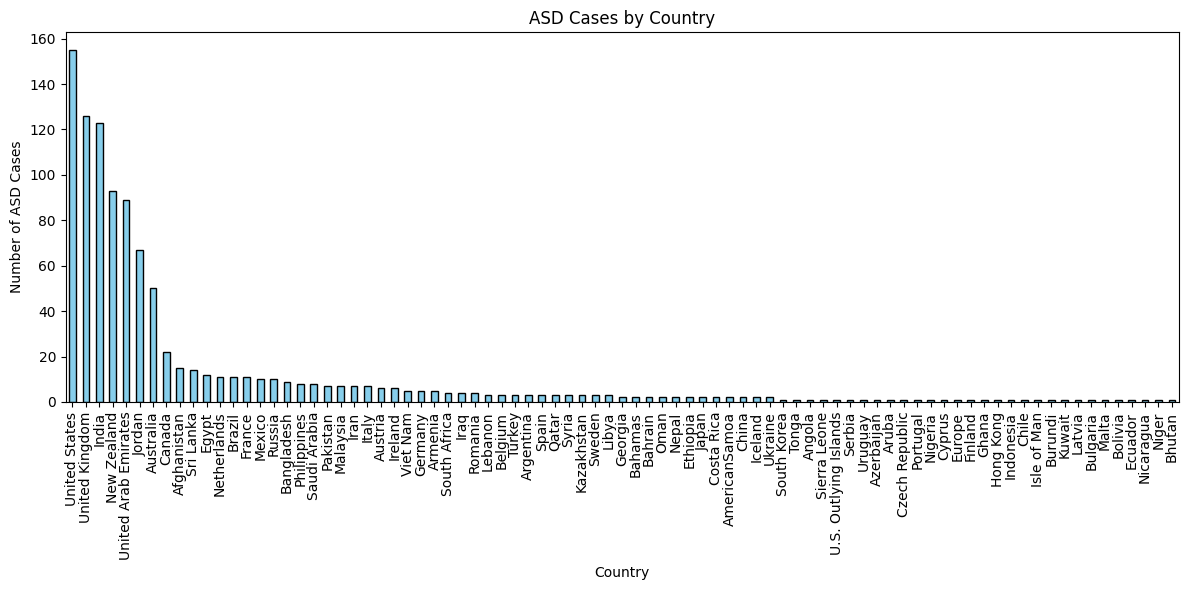

In [22]:
def plot_cases_by_country(df):
    # Group the data by country of residence and calculate the size of each group
    cases_by_country = df.groupby(
        'country_of_res').size().sort_values(ascending=False)

    # Plotting the number of cases by country
    plt.figure(figsize=(12, 6))
    cases_by_country.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.xlabel('Country')
    plt.ylabel('Number of ASD Cases')
    plt.title('ASD Cases by Country')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


plot_cases_by_country(merged_data)

Conclusion more residents of the United States have more ASD cases.

Used_app_before

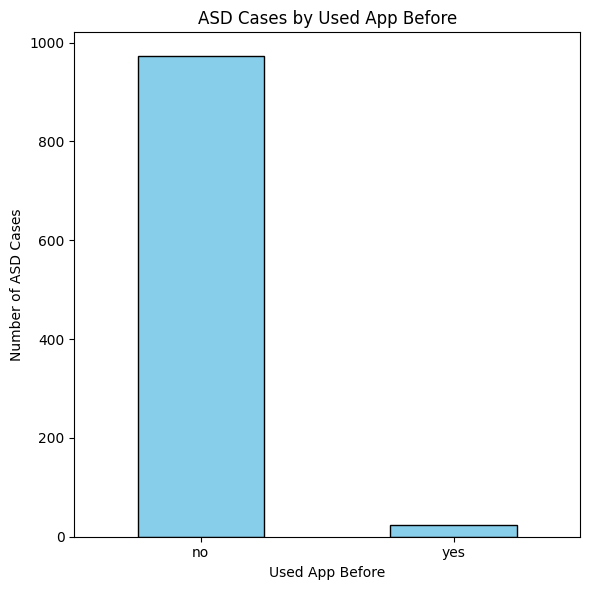

In [23]:
def plot_cases_by_used_app_before(df):
    # Group the data by 'used_app_before' and calculate the size of each group
    cases_by_used_app_before = df.groupby('used_app_before').size()

    # Plotting the number of cases by whether the individuals used the app before or not
    plt.figure(figsize=(6, 6))
    cases_by_used_app_before.plot(
        kind='bar', color='skyblue', edgecolor='black')
    plt.xlabel('Used App Before')
    plt.ylabel('Number of ASD Cases')
    plt.title('ASD Cases by Used App Before')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()


plot_cases_by_used_app_before(merged_data)

Feature Relevance

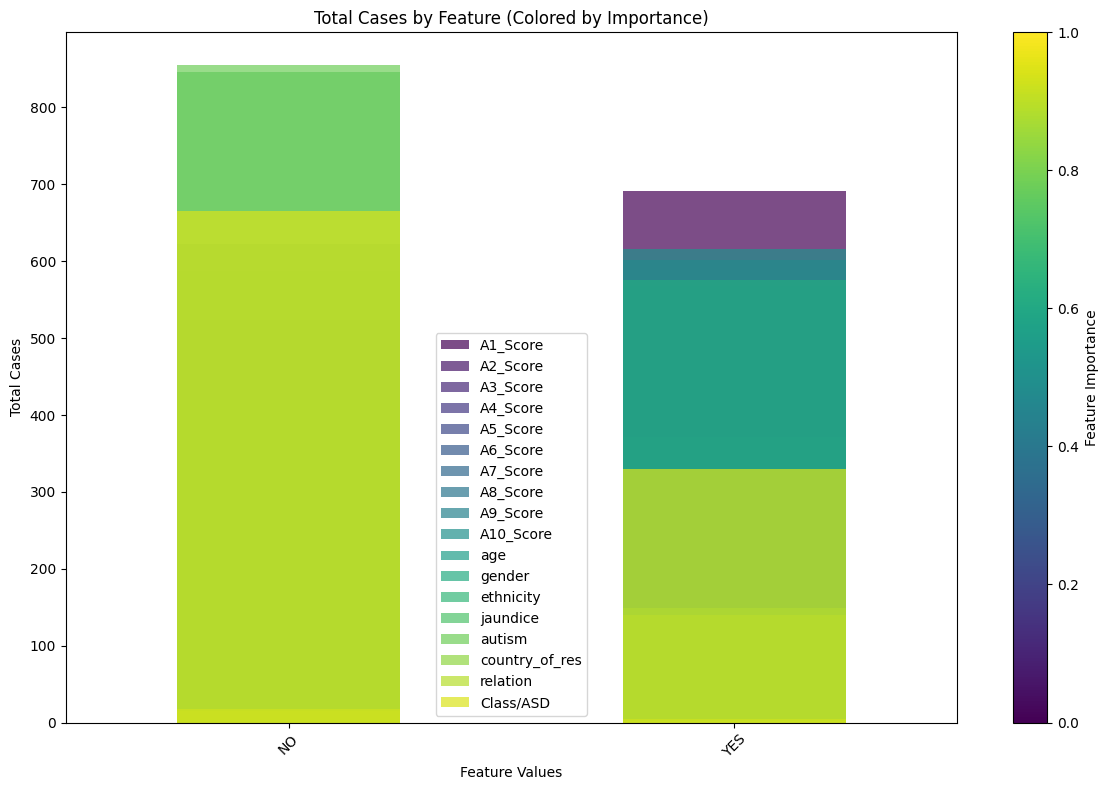

Relevant features and their importance scores:
Feature: A1_Score, Importance Score: 0
Feature: A2_Score, Importance Score: 1
Feature: A3_Score, Importance Score: 2
Feature: A4_Score, Importance Score: 3
Feature: A5_Score, Importance Score: 4
Feature: A6_Score, Importance Score: 5
Feature: A7_Score, Importance Score: 6
Feature: A8_Score, Importance Score: 7
Feature: A9_Score, Importance Score: 8
Feature: A10_Score, Importance Score: 9
Feature: age, Importance Score: 10
Feature: gender, Importance Score: 11
Feature: ethnicity, Importance Score: 12
Feature: jaundice, Importance Score: 13
Feature: autism, Importance Score: 14
Feature: country_of_res, Importance Score: 15
Feature: relation, Importance Score: 16
Feature: Class/ASD, Importance Score: 17


In [24]:
# Define features
features_numerical = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score',
                      'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age']
features_categorical = ['gender', 'ethnicity', 'jaundice',
                        'autism', 'country_of_res', 'relation', 'Class/ASD']

# Combine all features
all_features = features_numerical + features_categorical

# Calculate feature importance or relevance scores (you need to replace this with actual feature importance values)
feature_importance = {feature: importance_score for feature,
                      importance_score in zip(all_features, range(len(all_features)))}

# Define colormap
cmap = plt.get_cmap('viridis')  # You can choose any other colormap

# Plot total cases for each feature with colors based on importance
plt.figure(figsize=(12, 8))
for i, feature in enumerate(all_features):
    total_cases = merged_data.groupby(feature).size()
    # Normalize importance to [0, 1] for colormap
    color = cmap(feature_importance[feature] / len(all_features))
    # Use alpha to make bars transparent for better visualization
    total_cases.plot(kind='bar', color=color, alpha=0.7, label=feature)
plt.title('Total Cases by Feature (Colored by Importance)')
plt.xlabel('Feature Values')
plt.ylabel('Total Cases')
plt.legend()
plt.xticks(rotation=45)

# Add colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(
    vmin=0, vmax=1))  # Normalize colormap to [0, 1]
sm.set_array([])  # Set an empty array since we only want colors
cbar = plt.colorbar(sm, ax=plt.gca())  # Specify the axes for the colorbar
cbar.set_label('Feature Importance')

plt.tight_layout()
plt.show()

# Print out relevant features and their importance scores
print("Relevant features and their importance scores:")
for feature, importance_score in feature_importance.items():
    print(f"Feature: {feature}, Importance Score: {importance_score}")

Extracting Features

In [25]:
def split_data(merged_data):
    # Extract features and target label
    features = merged_data.drop(columns=['Class/ASD'])
    target_label = merged_data['Class/ASD']

    return features, target_label


features, target_label = split_data(merged_data)

Feature Scaling

In [26]:
def min_max_scale_numerical_features(features, features_numerical):
    # Initialize MinMaxScaler
    scaler = MinMaxScaler()

    # Apply Min-Max scaling to numerical features
    features_minmax_transform = pd.DataFrame(data=features)
    features_minmax_transform[features_numerical] = scaler.fit_transform(
        features[features_numerical])

    return features_minmax_transform


features_numerical = ['age']
features_minmax_transform = min_max_scale_numerical_features(
    features, features_numerical)

print("Example of records with scaling applied:")
display(features_minmax_transform.head(n=5))

Example of records with scaling applied:


,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,autism,country_of_res,used_app_before,relation,age_range
0,1,1,1,1,0,0,1,1,0,0,0.366667,f,White-European,no,no,United States,no,Self,24-28
1,1,1,0,1,0,0,0,1,0,1,0.333333,m,Latino,no,yes,Brazil,no,Self,24-28
2,1,1,0,1,1,0,1,1,1,1,0.383333,m,Latino,yes,yes,Spain,no,Parent,24-28
3,1,1,0,1,0,0,1,1,0,1,0.516667,f,White-European,no,yes,United States,no,Self,34-38
4,1,0,0,0,0,0,0,1,0,0,0.600000,f,NaN,no,no,Egypt,no,NaN,39-43


Label Encoding

In [27]:
def encode_categorical_columns(features_minmax_transform):
    """
    Encodes categorical columns in the features_minmax_transform DataFrame using label encoding.
    """
    le = LabelEncoder()
    for column in features_minmax_transform.columns:
        if pd.api.types.is_numeric_dtype(features_minmax_transform[column]):
            continue
        features_minmax_transform[column] = le.fit_transform(
            features_minmax_transform[column])

        # Save the encoder as a .pkl file
        joblib.dump(le, 'label_encoder.pkl')

    return features_minmax_transform


# Encode the 'Class/ASD' target label to numerical values (0 and 1)
merged_data_classes = target_label.apply(lambda x: 1 if x == 'YES' else 0)

features_minmax_transform = encode_categorical_columns(
    features_minmax_transform)
features_final = features_minmax_transform

# Display the first 5 rows of encoded features
print("One-hot encoded features:")
display(features_final.head(5))

# Print the number of features after one-hot encoding
encoded_features_count = len(features_final.columns)
print(f"{encoded_features_count} total features after one-hot encoding.")

print(features_final.columns.tolist())

One-hot encoded features:


,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,autism,country_of_res,used_app_before,relation,age_range
0,1,1,1,1,0,0,1,1,0,0,0.366667,0,9,0,0,80,0,4,2
1,1,1,0,1,0,0,0,1,0,1,0.333333,1,3,0,1,15,0,4,2
2,1,1,0,1,1,0,1,1,1,1,0.383333,1,3,1,1,70,0,2,2
3,1,1,0,1,0,0,1,1,0,1,0.516667,0,9,0,1,80,0,4,4
4,1,0,0,0,0,0,0,1,0,0,0.600000,0,11,0,0,25,0,5,5


19 total features after one-hot encoding.
['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender', 'ethnicity', 'jaundice', 'autism', 'country_of_res', 'used_app_before', 'relation', 'age_range']


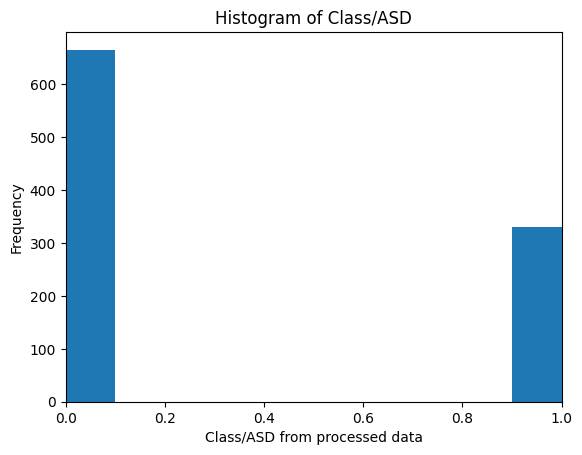

In [ ]:
def plot_class_histogram(merged_data_classes):
    # Plot histogram with 10 bins
    plt.hist(merged_data_classes, bins=10)

    # Set x-axis limit from 0 to 1
    plt.xlim(0, 1)
    plt.title('Histogram of Class/ASD')
    plt.xlabel('Class/ASD from processed data')
    plt.ylabel('Frequency')
    plt.show()

# Call the function with the 'Class/ASD' target label
plot_class_histogram(merged_data_classes)


Checking if categorical variables have been converted into numerical features, and all numerical features have been normalized

Splitting datasets

In [ ]:
def split_data(features_final, merged_data_classes):
    # Split combined dataset into features (X) and target variable (y)
    X = features_final
    y = merged_data_classes

    # Perform randomization and split into train, validation, and test sets
    X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15, stratify=y_train_val, random_state=42)

    return X_train, X_val, X_test, y_train, y_val, y_test

# Call the function to split the data
X_train, X_val, X_test, y_train, y_val, y_test = split_data(features_final, merged_data_classes)

print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (718, 19) (718,)
Validation set shape: (127, 19) (127,)
Testing set shape: (150, 19) (150,)


In [ ]:
# Check data types for DataFrame columns
print("Data types:")
print("X_train:")
print(X_train.dtypes)
print("\ny_train:")
print(y_train.dtypes)
print("\nX_val:")
print(X_val.dtypes)
print("\ny_val:")
print(y_val.dtypes)


Data types:
X_train:
A1_Score             int64
A2_Score             int64
A3_Score             int64
A4_Score             int64
A5_Score             int64
A6_Score             int64
A7_Score             int64
A8_Score             int64
A9_Score             int64
A10_Score            int64
age                float64
gender               int64
ethnicity            int64
jaundice             int64
autism               int64
country_of_res       int64
used_app_before      int64
relation             int64
age_range            int64
dtype: object

y_train:
int64

X_val:
A1_Score             int64
A2_Score             int64
A3_Score             int64
A4_Score             int64
A5_Score             int64
A6_Score             int64
A7_Score             int64
A8_Score             int64
A9_Score             int64
A10_Score            int64
age                float64
gender               int64
ethnicity            int64
jaundice             int64
autism               int64
country_of_res       in

In [ ]:
# Check data types
print("Data types:")
print("X_train:")
print(X_train.dtypes)
print("y_train:")
print(y_train.dtypes)
print("X_val:")
print(X_val.dtypes)
print("y_val:")
print(y_val.dtypes)

# Check for non-numeric values
def check_non_numeric(data, name):
    non_numeric_count = np.sum(np.isnan(data) | np.isinf(data))
    print(f"Non-numeric values in {name}: {non_numeric_count}")

check_non_numeric(X_train, "X_train")
check_non_numeric(X_val, "X_val")
check_non_numeric(y_train, "y_train")
check_non_numeric(y_val, "y_val")

# Check shapes
print("Shapes:")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)


Data types:
X_train:
A1_Score             int64
A2_Score             int64
A3_Score             int64
A4_Score             int64
A5_Score             int64
A6_Score             int64
A7_Score             int64
A8_Score             int64
A9_Score             int64
A10_Score            int64
age                float64
gender               int64
ethnicity            int64
jaundice             int64
autism               int64
country_of_res       int64
used_app_before      int64
relation             int64
age_range            int64
dtype: object
y_train:
int64
X_val:
A1_Score             int64
A2_Score             int64
A3_Score             int64
A4_Score             int64
A5_Score             int64
A6_Score             int64
A7_Score             int64
A8_Score             int64
A9_Score             int64
A10_Score            int64
age                float64
gender               int64
ethnicity            int64
jaundice             int64
autism               int64
country_of_res       int6

Saving data files

In [ ]:
def save_data(X_train, X_test, y_train, y_test):
    """
    Save both X_test and y_test into one file, and X_train and y_train into one file.

    """
    # Concatenate X_test and y_test along columns axis
    test_data = pd.concat([X_test, y_test], axis=1)

    # Concatenate X_train and y_train along columns axis
    train_data = pd.concat([X_train, y_train], axis=1)

    # Save concatenated data to CSV files inside the data folder
    test_data.to_csv("/content/data/test_data.csv", index=False)
    train_data.to_csv("/content/data/train_data.csv", index=False)

    print("Data saved to data/test_data.csv and data/train_data.csv files.")

save_data(X_train, X_test, y_train, y_test)


Data saved to data/test_data.csv and data/train_data.csv files.


# **Model Implementation**

1. Random Forest Classifier

In [ ]:
def train_random_forest(X_train, X_test, y_train, y_test, tune=False):
    if tune:
        # Define the parameter grid
        param_grid = {
            'n_estimators': [100, 200, 300],
            'max_features': ['sqrt'],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'criterion': ['entropy']
        }
        # Initialize the Random Forest model
        model = RandomForestClassifier(random_state=50)
        # Apply GridSearchCV
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, verbose=1, scoring='accuracy')
        grid_search.fit(X_train, y_train)
        # Best parameters found
        best_params = grid_search.best_params_
        print(f"Best parameters with hyperparameter tuning: {best_params}")
        # Initialize model with best parameters
        model = RandomForestClassifier(**best_params)
    else:
        # Initialize model with default parameters
        model = RandomForestClassifier()

    # Train the model
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability estimates of the positive class (for log loss and AUC)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    logloss = log_loss(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    kappa = cohen_kappa_score(y_test, y_pred)
    error_rate = 1 - accuracy

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    # Output the results
    if tune:
        print("Random Forest - Training Results with hyperparameter tuning:")
    else:
        print("Random Forest - Training Results without hyperparameter tuning:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Log Loss: {logloss:.4f}")
    print(f"AUC Score: {auc:.4f}")
    print(f"Kappa Score: {kappa:.4f}")
    print(f"Error Rate: {error_rate:.4f}")
    print(f"Confusion Matrix:\n{cm}\n")

    # Save the model
    model_path = "/content/models/random_forest.pkl"
    joblib.dump(model, model_path)
    print(f"Trained model saved as {model_path}")

    return model


train_random_forest(X_train, X_test, y_train, y_test, tune=True)
train_random_forest(X_train, X_test, y_train, y_test, tune=False)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters with hyperparameter tuning: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Random Forest - Training Results with hyperparameter tuning:
Accuracy: 0.9467
Precision: 0.9375
Recall: 0.9000
F1 Score: 0.9184
Log Loss: 0.1792
AUC Score: 0.9928
Kappa Score: 0.8788
Error Rate: 0.0533
Confusion Matrix:
[[97  3]
 [ 5 45]]

Trained model saved as /content/models/random_forest.pkl
Random Forest - Training Results without hyperparameter tuning:
Accuracy: 0.9400
Precision: 0.9184
Recall: 0.9000
F1 Score: 0.9091
Log Loss: 0.1710
AUC Score: 0.9922
Kappa Score: 0.8643
Error Rate: 0.0600
Confusion Matrix:
[[96  4]
 [ 5 45]]

Trained model saved as /content/models/random_forest.pkl


RandomForestClassifier()

AdaBoost Classifier

In [ ]:
def train_adaboost(X_train, X_test, y_train, y_test, tune=False):
    if tune:
        # Define the parameter grid
        param_grid = {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.1, 0.5, 1.0]
        }
        # Initialize the AdaBoost model
        model = AdaBoostClassifier(random_state=0)
        # Apply GridSearchCV
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, verbose=1, scoring='accuracy')
        grid_search.fit(X_train, y_train)
        # Best parameters found
        best_params = grid_search.best_params_
        print(f"Best parameters with hyperparameter tuning: {best_params}")
        # Initialize model with best parameters
        model = AdaBoostClassifier(**best_params, random_state=0)
    else:
        # Initialize model with default parameters
        model = AdaBoostClassifier(random_state=0)

    # Train the model
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability estimates of the positive class (for log loss and AUC)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    logloss = log_loss(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    kappa = cohen_kappa_score(y_test, y_pred)
    error_rate = 1 - accuracy

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    # Output the results
    if tune:
        print("AdaBoost - Training Results with hyperparameter tuning:")
    else:
        print("AdaBoost - Training Results without hyperparameter tuning:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Log Loss: {logloss:.4f}")
    print(f"AUC Score: {auc:.4f}")
    print(f"Kappa Score: {kappa:.4f}")
    print(f"Error Rate: {error_rate:.4f}")
    print(f"Confusion Matrix:\n{cm}\n")

    # Save the model
    model_dir = "/content/models"
    if not os.path.exists(model_dir):
        os.makedirs(model_dir)
    model_path = os.path.join(model_dir, "ada_boost.pkl")
    joblib.dump(model, model_path)
    print(f"Trained model saved as {model_path}")

    return model


train_adaboost(X_train, X_test, y_train, y_test, tune=True)
train_adaboost(X_train, X_test, y_train, y_test, tune=False)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters with hyperparameter tuning: {'learning_rate': 0.1, 'n_estimators': 200}
AdaBoost - Training Results with hyperparameter tuning:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Log Loss: 0.5607
AUC Score: 1.0000
Kappa Score: 1.0000
Error Rate: 0.0000
Confusion Matrix:
[[100   0]
 [  0  50]]

Trained model saved as /content/models/ada_boost.pkl
AdaBoost - Training Results without hyperparameter tuning:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Log Loss: 0.5481
AUC Score: 1.0000
Kappa Score: 1.0000
Error Rate: 0.0000
Confusion Matrix:
[[100   0]
 [  0  50]]

Trained model saved as /content/models/ada_boost.pkl


AdaBoostClassifier(random_state=0)

XGBoost Classifier

In [ ]:
def train_xgboost(X_train, X_test, y_train, y_test, tune=False):
    if tune:
        # Define the parameter grid for hyperparameter tuning
        param_grid = {
              'n_estimators': [100],
              'max_depth': [3],
              'learning_rate': [0.01],
              'min_child_weight': [1],
              'gamma': [0],
              'subsample': [0.6],
              'colsample_bytree': [0.6],
              'reg_alpha': [0],
              'reg_lambda': [0]
        }
        # Initialize the XGBoost model
        model = XGBClassifier(random_state=42)
        # Apply GridSearchCV for hyperparameter tuning
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, verbose=1, scoring='accuracy')
        grid_search.fit(X_train, y_train)
        # Best parameters found
        best_params = grid_search.best_params_
        print(f"Best parameters with hyperparameter tuning: {best_params}")
        # Initialize model with best parameters
        model = XGBClassifier(**best_params)
    else:
        # Initialize model with default parameters
        model = XGBClassifier(random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability estimates of the positive class (for log loss and AUC)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    logloss = log_loss(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    kappa = cohen_kappa_score(y_test, y_pred)
    error_rate = 1 - accuracy

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    # Output the results
    if tune:
        print("XGBoost - Training Results with hyperparameter tuning:")
    else:
        print("XGBoost - Training Results without hyperparameter tuning:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Log Loss: {logloss:.4f}")
    print(f"AUC Score: {auc:.4f}")
    print(f"Kappa Score: {kappa:.4f}")
    print(f"Error Rate: {error_rate:.4f}")
    print(f"Confusion Matrix:\n{cm}\n")

    return model


train_xgboost(X_train, X_test, y_train, y_test, tune=True)
train_xgboost(X_train, X_test, y_train, y_test, tune=False)

# Saving the trained model
model = train_xgboost(X_train, X_test, y_train, y_test, tune=True)  # Example: Training with hyperparameter tuning
with open('/content/models/xgboost.pkl', 'wb') as file:
    pickle.dump(model, file)


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters with hyperparameter tuning: {'colsample_bytree': 0.6, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'reg_alpha': 0, 'reg_lambda': 0, 'subsample': 0.6}
XGBoost - Training Results with hyperparameter tuning:
Accuracy: 0.9200
Precision: 0.9750
Recall: 0.7800
F1 Score: 0.8667
Log Loss: 0.3486
AUC Score: 0.9836
Kappa Score: 0.8105
Error Rate: 0.0800
Confusion Matrix:
[[99  1]
 [11 39]]

XGBoost - Training Results without hyperparameter tuning:
Accuracy: 0.9600
Precision: 0.9231
Recall: 0.9600
F1 Score: 0.9412
Log Loss: 0.0636
AUC Score: 0.9978
Kappa Score: 0.9109
Error Rate: 0.0400
Confusion Matrix:
[[96  4]
 [ 2 48]]

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters with hyperparameter tuning: {'colsample_bytree': 0.6, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'reg_alpha': 0, 'reg_lambda': 

Selecting the best Model

In [ ]:
def select_best_model(model_accuracies):
    """
    Selects the model with the highest accuracy from a dictionary of model accuracies.

    """
    # Select the model with the highest accuracy
    best_model_name = max(model_accuracies, key=model_accuracies.get)
    best_model_accuracy = model_accuracies[best_model_name]

    return best_model_name, best_model_accuracy


model_accuracies = {
    'Random Forest': 1.0,
    'Support Vector Classifier':1.0,
    'XGBoost Classifier': 1.0
}

best_model_name, best_model_accuracy = select_best_model(model_accuracies)
print(f"Best model: {best_model_name}, Accuracy: {best_model_accuracy}")


Best model: Random Forest, Accuracy: 1.0


Predictive Function

In [ ]:
# scaling function
def min_max_scale_numerical_features(features, features_numerical):
    scaler = MinMaxScaler()
    features_minmax_transform = pd.DataFrame(data=features)
    features_minmax_transform[features_numerical] = scaler.fit_transform(features[features_numerical])
    return features_minmax_transform

# encoding function
def encode_categorical_columns(features_minmax_transform):
    le = LabelEncoder()
    for column in features_minmax_transform.columns:
        if pd.api.types.is_numeric_dtype(features_minmax_transform[column]):
            continue
        features_minmax_transform[column] = le.fit_transform(features_minmax_transform[column])
    return features_minmax_transform

# Preprocess features function
def preprocess_features(input_data):
    features_numerical = ['age']  # Define numerical features
    input_data_scaled = min_max_scale_numerical_features(input_data, features_numerical)
    input_data_encoded = encode_categorical_columns(input_data_scaled)
    return input_data_encoded

# Load the Random Forest model from the pickle file
random_forest_model = joblib.load("/content/models/random_forest.pkl")

# Prediction function
def predict_input(random_forest_model):
    # Collect user input
    print("Please enter the following information:")
    A1_Score = int(input("A1 Score (0/1): "))
    A2_Score = int(input("A2 Score (0/1): "))
    A3_Score = int(input("A3 Score (0/1): "))
    A4_Score = int(input("A4 Score (0/1): "))
    A5_Score = int(input("A5 Score (0/1): "))
    A6_Score = int(input("A6 Score (0/1): "))
    A7_Score = int(input("A7 Score (0/1): "))
    A8_Score = int(input("A8 Score (0/1): "))
    A9_Score = int(input("A9 Score (0/1): "))
    A10_Score = int(input("A10 Score (0/1): "))
    age = int(input("Age: "))
    gender = input("Gender (Male/Female): ")
    ethnicity = input("Ethnicity: ")
    jaundice = input("Jaundice history (Yes/No): ")
    autism = input("Autism diagnosis (Yes/No): ")
    country_of_res = input("Country of residence: ")
    used_app_before = input("Used app before (Yes/No): ")
    relation = input("Relation (Health care professional/Others/Parent/Relative/Self): ")
    age_range = input("Age range (4-8/9-13/14-18/19-23/24-28/29-33/34-38/39-43/44-48/49-53/54-58/59-63): ")

    # Create a DataFrame from the user input
    input_data = pd.DataFrame({
        'A1_Score': [A1_Score],
        'A2_Score': [A2_Score],
        'A3_Score': [A3_Score],
        'A4_Score': [A4_Score],
        'A5_Score': [A5_Score],
        'A6_Score': [A6_Score],
        'A7_Score': [A7_Score],
        'A8_Score': [A8_Score],
        'A9_Score': [A9_Score],
        'A10_Score': [A10_Score],
        'age': [age],
        'gender': [gender],
        'ethnicity': [ethnicity],
        'jaundice': [jaundice],
        'autism': [autism],
        'country_of_res': [country_of_res],
        'used_app_before': [used_app_before],
        'relation': [relation],
        'age_range': [age_range]
    })


    # Preprocess the input data
    input_data_transformed = preprocess_features(input_data)

    # Make prediction
    prediction = model.predict(input_data_transformed)

    # Output the prediction
    print("Prediction: ", "Yes, ASD" if prediction == 1 else "No ASD")


predict_input(random_forest_model)


Please enter the following information:
A1 Score (0/1): 1
A2 Score (0/1): 0
A3 Score (0/1): 1
A4 Score (0/1): 1
A5 Score (0/1): 1
A6 Score (0/1): 1
A7 Score (0/1): 0
A8 Score (0/1): 1
A9 Score (0/1): 1
A10 Score (0/1): 1
Age: 19
Gender (Male/Female): Male
Ethnicity: Asian
Jaundice history (Yes/No): Yes
Autism diagnosis (Yes/No): No
Country of residence: United States
Used app before (Yes/No): No
Relation (Health care professional/Others/Parent/Relative/Self): Self
Age range (4-8/9-13/14-18/19-23/24-28/29-33/34-38/39-43/44-48/49-53/54-58/59-63): 19-23
Prediction:  Yes, ASD
